In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import time
import pandas as pd
import numpy as np
# Classifier Libraries
from sklearn.tree import DecisionTreeClassifier
import collections
#Resampling-Methode
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE
# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report,roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score as rs
from sklearn.metrics import precision_score as ps
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import f1_score as fs
from collections import Counter
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize
from sklearn import metrics
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

# Datensätzen einlesen

In [2]:
df =pd.read_csv(r'C:\Tensorflow Object Detection\TFODCourse\covid 19\dev_dec_jan.csv')

In [3]:
df

,state,county,age_group,gender,date,cases,deaths,recovered,density_county,density_state,geschlecht_org,datum
0,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-15,1,0,1,1358,311,0,1605398400
1,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-17,1,0,1,1358,311,0,1605571200
2,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-18,1,0,1,1358,311,0,1605657600
3,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-19,1,0,1,1358,311,0,1605744000
4,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-25,1,0,1,1358,311,0,1606262400
...,...,...,...,...,...,...,...,...,...,...,...,...
1539620,Thueringen,SK Weimar,90,M,2021-02-03,3,0,1,772,132,1,1612310400
1539621,Thueringen,SK Weimar,90,M,2021-02-03,3,0,1,772,132,1,1612310400
1539622,Thueringen,SK Weimar,90,M,2021-02-05,1,0,1,772,132,1,1612483200
1539623,Thueringen,SK Weimar,90,M,2021-02-11,1,0,1,772,132,1,1613001600


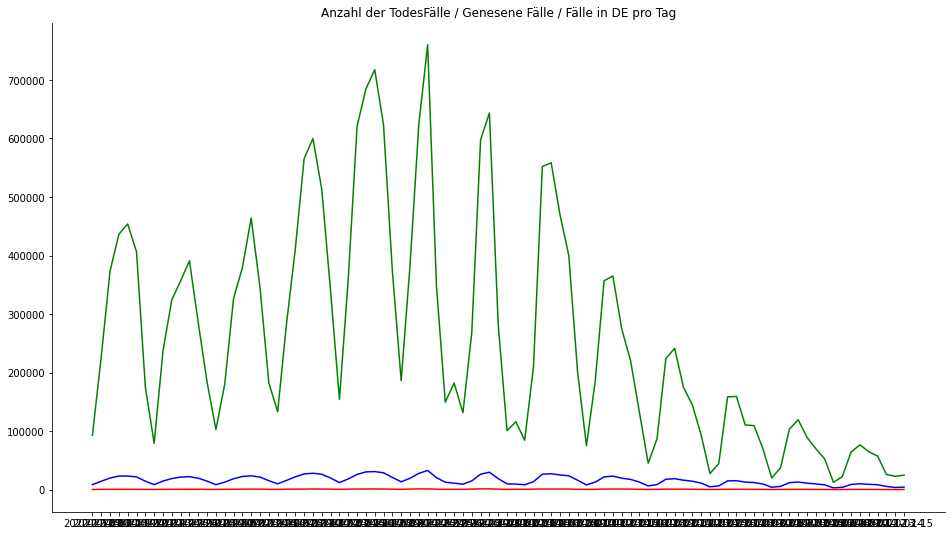

In [4]:
df_cases = df.groupby(['date']).sum().reset_index()
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(df_cases["date"],
        df_cases["cases"],
        color="g");
ax.plot(df_cases["date"],
        df_cases["recovered"],
        color="b");
ax.plot(df_cases["date"],
        df_cases["deaths"],
        color="r");
ax.set_title("Anzahl der TodesFälle / Genesene Fälle / Fälle in DE pro Tag");
ax.spines["top"].set_visible(False);
ax.spines["right"].set_visible(False);

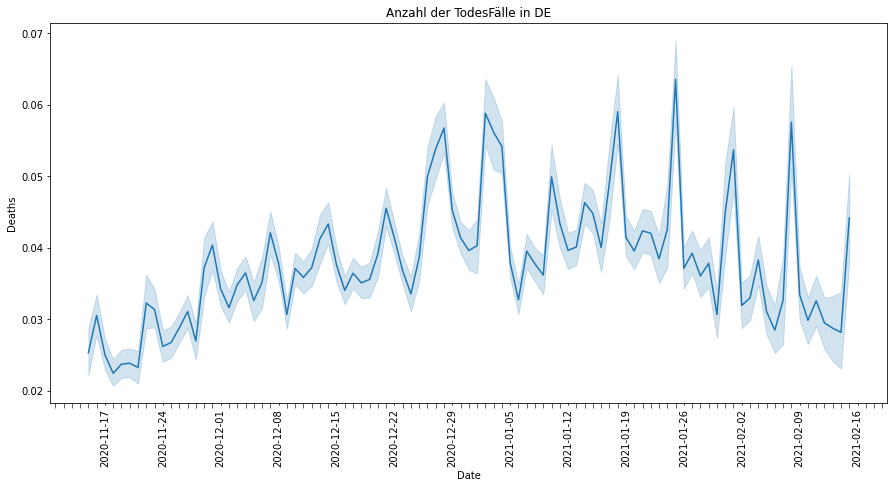

In [5]:
import matplotlib.dates as md
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
# prepare the figure
fig, ax = plt.subplots(figsize = (15, 7))

# set up the plot
sns.lineplot(ax = ax, x='date', y='deaths', data=df).set_title('Anzahl der TodesFälle in DE')

# specify the position of the major ticks at the beginning of the week
ax.xaxis.set_major_locator(md.WeekdayLocator(byweekday = 1))
# specify the format of the labels as 'year-month-day'
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))
# (optional) rotate by 90° the labels in order to improve their spacing
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 90)

# specify the position of the minor ticks at each day
ax.xaxis.set_minor_locator(md.DayLocator(interval = 1))

# set ticks length
ax.tick_params(axis = 'x', which = 'major', length = 2)
ax.tick_params(axis = 'x', which = 'minor', length = 5)

# set axes labels
plt.xlabel('Date')
plt.ylabel('Deaths')

# show the plot
plt.show()

# Anzahl der Todesfälle in DE zwischen 15-11-2020 und 15-2-2021

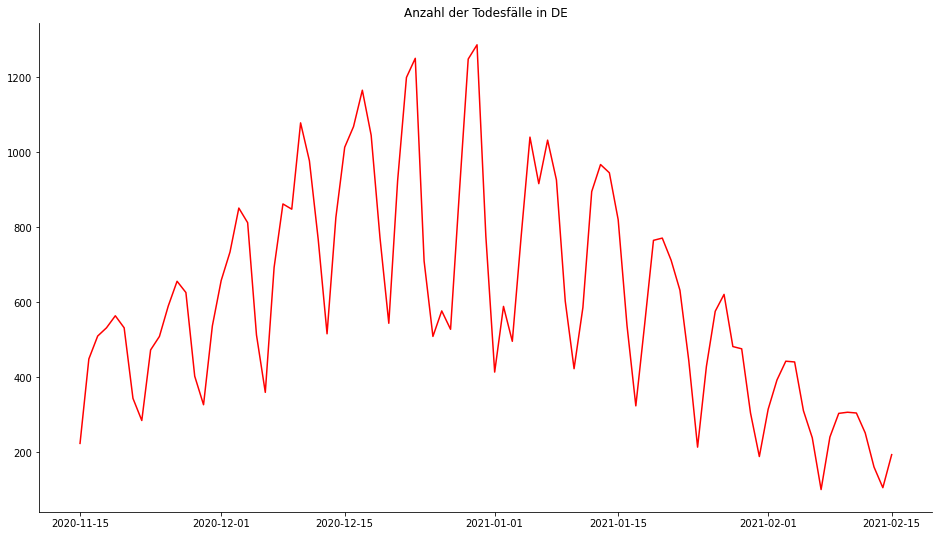

In [6]:
df_cases = df.groupby(['date']).sum().reset_index()
fig, ax = plt.subplots(figsize=(16,9))
# ax.plot(df_cases["date"],
#         df_cases["cases"],
#         color="g");
# ax.plot(df_cases["date"],
#         df_cases["recovered"],
#         color="b");
ax.plot(df_cases["date"],
        df_cases["deaths"],
        color="r");
ax.set_title("Anzahl der Todesfälle in DE");
ax.spines["top"].set_visible(False);
ax.spines["right"].set_visible(False);

In [7]:
df

,state,county,age_group,gender,date,cases,deaths,recovered,density_county,density_state,geschlecht_org,datum
0,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-15,1,0,1,1358,311,0,1605398400
1,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-17,1,0,1,1358,311,0,1605571200
2,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-18,1,0,1,1358,311,0,1605657600
3,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-19,1,0,1,1358,311,0,1605744000
4,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-25,1,0,1,1358,311,0,1606262400
...,...,...,...,...,...,...,...,...,...,...,...,...
1539620,Thueringen,SK Weimar,90,M,2021-02-03,3,0,1,772,132,1,1612310400
1539621,Thueringen,SK Weimar,90,M,2021-02-03,3,0,1,772,132,1,1612310400
1539622,Thueringen,SK Weimar,90,M,2021-02-05,1,0,1,772,132,1,1612483200
1539623,Thueringen,SK Weimar,90,M,2021-02-11,1,0,1,772,132,1,1613001600


<AxesSubplot:title={'center':'deaths'}>

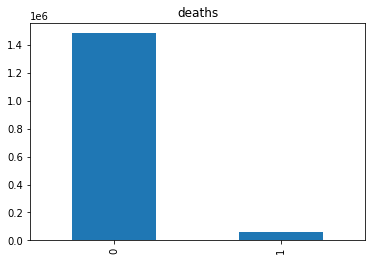

In [8]:
df["deaths"].value_counts().plot.bar(title='deaths')

<AxesSubplot:title={'center':'gender'}>

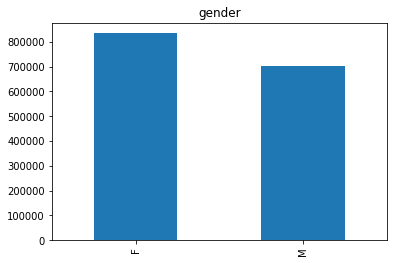

In [9]:
REASON_count= df["gender"].value_counts().rename_axis('gender').reset_index(name='Total Count')
df["gender"].value_counts().plot.bar(title='gender')

<AxesSubplot:title={'center':'age_group'}>

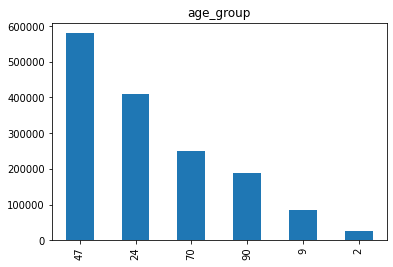

In [10]:
REASON_count= df["age_group"].value_counts().rename_axis('gender').reset_index(name='Total Count')
df["age_group"].value_counts().plot.bar(title='age_group')

# Todesfälle nach Altergruppen in DE zwischen 15-11-2020 und 15-2-2021

<AxesSubplot:title={'center':'Todesfälle nach Altergruppen in DE'}, xlabel='age_group', ylabel='Todesfälle'>

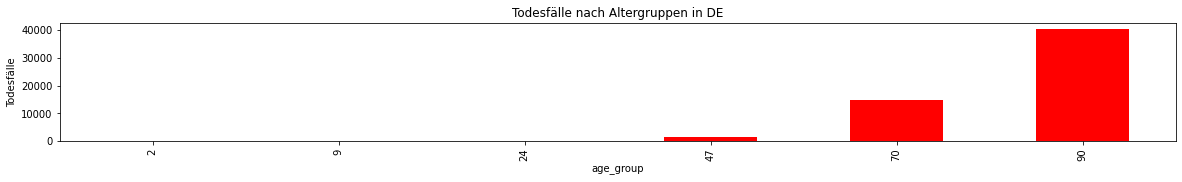

In [11]:
import matplotlib.pyplot as plt
age_group =df.groupby(['age_group']).sum()
deaths_age_group=age_group['deaths']
fig=plt.figure(figsize=[20,10])
ax=fig.add_subplot(4,1,1)
ax.set_ylabel('Todesfälle')
ax.set_title('Todesfälle nach Altergruppen in DE')
deaths_age_group.plot(kind='bar',color='red')

In [12]:
cov_age = df.groupby(['age_group']).sum().reset_index()
cov_age["death_percentage"] = round(cov_age["deaths"]/cov_age["cases"]* 100,1)
cov_age

,age_group,cases,deaths,recovered,density_county,density_state,geschlecht_org,datum,death_percentage
0,2,55223,4,26695,28301168,13932896,13710,42956257996800,0.0
1,9,380245,3,83262,92200249,44698429,43550,133930913788800,0.0
2,24,6566504,55,411117,484534493,227525066,198309,661483489737600,0.0
3,47,12300314,1644,578880,600376847,296222362,265827,933964271596800,0.0
4,70,2396216,14840,235545,242916937,123333769,122442,402860588947200,0.6
5,90,2090260,40577,147003,179640177,90934983,60363,301824364060800,1.9


<AxesSubplot:title={'center':'age_group vs deaths / recovered'}, xlabel='age_group'>

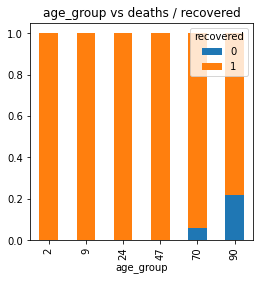

In [13]:
gender=pd.crosstab(df['age_group'],df['recovered'])
gender.div(gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, title='age_group vs deaths / recovered', figsize=(4,4))

In [14]:
df.head(1)

,state,county,age_group,gender,date,cases,deaths,recovered,density_county,density_state,geschlecht_org,datum
0,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-15,1,0,1,1358,311,0,1605398400


In [15]:
df

,state,county,age_group,gender,date,cases,deaths,recovered,density_county,density_state,geschlecht_org,datum
0,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-15,1,0,1,1358,311,0,1605398400
1,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-17,1,0,1,1358,311,0,1605571200
2,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-18,1,0,1,1358,311,0,1605657600
3,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-19,1,0,1,1358,311,0,1605744000
4,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-25,1,0,1,1358,311,0,1606262400
...,...,...,...,...,...,...,...,...,...,...,...,...
1539620,Thueringen,SK Weimar,90,M,2021-02-03,3,0,1,772,132,1,1612310400
1539621,Thueringen,SK Weimar,90,M,2021-02-03,3,0,1,772,132,1,1612310400
1539622,Thueringen,SK Weimar,90,M,2021-02-05,1,0,1,772,132,1,1612483200
1539623,Thueringen,SK Weimar,90,M,2021-02-11,1,0,1,772,132,1,1613001600


In [16]:
df

,state,county,age_group,gender,date,cases,deaths,recovered,density_county,density_state,geschlecht_org,datum
0,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-15,1,0,1,1358,311,0,1605398400
1,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-17,1,0,1,1358,311,0,1605571200
2,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-18,1,0,1,1358,311,0,1605657600
3,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-19,1,0,1,1358,311,0,1605744000
4,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-25,1,0,1,1358,311,0,1606262400
...,...,...,...,...,...,...,...,...,...,...,...,...
1539620,Thueringen,SK Weimar,90,M,2021-02-03,3,0,1,772,132,1,1612310400
1539621,Thueringen,SK Weimar,90,M,2021-02-03,3,0,1,772,132,1,1612310400
1539622,Thueringen,SK Weimar,90,M,2021-02-05,1,0,1,772,132,1,1612483200
1539623,Thueringen,SK Weimar,90,M,2021-02-11,1,0,1,772,132,1,1613001600


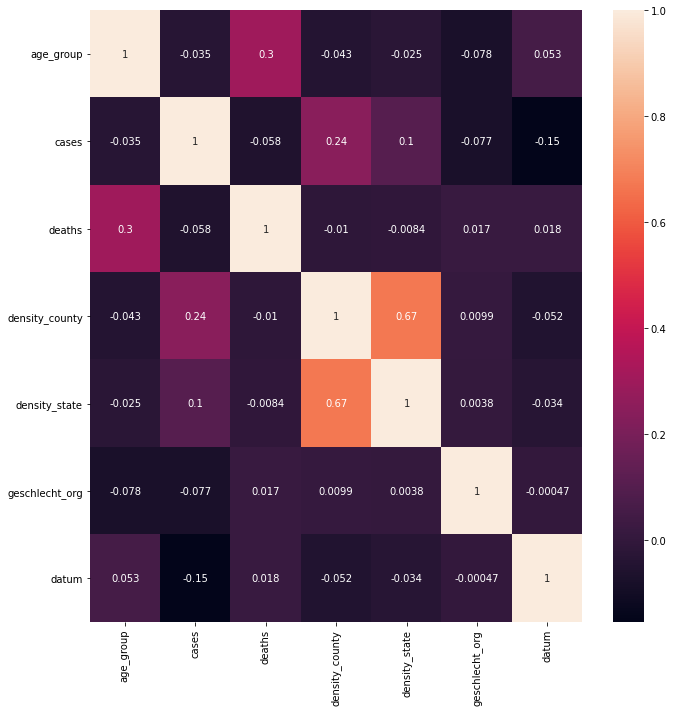

<Figure size 432x288 with 0 Axes>

In [17]:
corr = df.drop(['state','county','date','gender','recovered'], axis=1).corr()
# Plot heatmap of correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)
plt.yticks(rotation=0); plt.xticks(rotation=90)  # fix ticklabel directions
plt.tight_layout()  # fits plot area to the plot, "tightly"
plt.show()  # show the plot
plt.clf()

# Korrelationsmatrix zwischen den Variablen des Covid-19-Datensatzes:
    Die hervorgehobene Zelle unten zeigt beispielsweise, dass die Korrelation zwischen den Spalten „deaths“ und „age_group“ 
    0,3 beträgt, was darauf hinweist, dass sie positiv korreliert sind. Je älter die Covid-19 erkrankten Personen sind
    , desto mehr sterben sie an Covid-19.

In [18]:
df.isnull().sum()

state             0
county            0
age_group         0
gender            0
date              0
cases             0
deaths            0
recovered         0
density_county    0
density_state     0
geschlecht_org    0
datum             0
dtype: int64

In [19]:
df

,state,county,age_group,gender,date,cases,deaths,recovered,density_county,density_state,geschlecht_org,datum
0,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-15,1,0,1,1358,311,0,1605398400
1,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-17,1,0,1,1358,311,0,1605571200
2,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-18,1,0,1,1358,311,0,1605657600
3,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-19,1,0,1,1358,311,0,1605744000
4,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-25,1,0,1,1358,311,0,1606262400
...,...,...,...,...,...,...,...,...,...,...,...,...
1539620,Thueringen,SK Weimar,90,M,2021-02-03,3,0,1,772,132,1,1612310400
1539621,Thueringen,SK Weimar,90,M,2021-02-03,3,0,1,772,132,1,1612310400
1539622,Thueringen,SK Weimar,90,M,2021-02-05,1,0,1,772,132,1,1612483200
1539623,Thueringen,SK Weimar,90,M,2021-02-11,1,0,1,772,132,1,1613001600


In [20]:
df["deaths"].sum()

57123

In [21]:
df["recovered"].sum()

1482502

# Ausführung des DecisionTreeClassifier-Algorithmus auf dem Covid-19-Datensatz 

In [22]:
y = df.deaths
X = df.drop(['deaths'],axis=1)

In [23]:
y.sum()

57123

In [24]:
X_train_input, X_test_input, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [25]:
X_train_input.head(4)

,state,county,age_group,gender,date,cases,recovered,density_county,density_state,geschlecht_org,datum
1122545,Nordrhein-Westfalen,SK Koeln,90,F,2021-01-20,14,1,2686,526,0,1611100800
1365100,Sachsen,LK Zwickau,90,M,2021-01-12,21,1,332,221,1,1610409600
917322,Nordrhein-Westfalen,LK Maerkischer Kreis,47,F,2021-02-03,17,1,387,526,0,1612310400
1318388,Sachsen,LK Mittelsachsen,70,F,2020-12-28,9,0,144,221,0,1609113600


In [26]:
X_test_input.head(4)

,state,county,age_group,gender,date,cases,recovered,density_county,density_state,geschlecht_org,datum
899007,Nordrhein-Westfalen,LK Hochsauerlandkreis,90,M,2021-01-20,4,1,133,526,1,1611100800
1057250,Nordrhein-Westfalen,SK Dortmund,47,M,2021-01-20,20,1,2096,526,1,1611100800
490454,Berlin,SK Berlin Neukoelln,90,F,2020-12-17,35,1,14201,4090,0,1608163200
1307121,Sachsen,LK Meissen,70,M,2020-12-07,24,1,166,221,1,1607299200


In [27]:
df.head(1)

,state,county,age_group,gender,date,cases,deaths,recovered,density_county,density_state,geschlecht_org,datum
0,Baden-Wuerttemberg,LK Alb-Donau-Kreis,2,F,2020-11-15,1,0,1,1358,311,0,1605398400


In [28]:
X_test=X_test_input.drop(['state','county','date','gender','cases', 'recovered'], axis=1)
X_train=X_train_input.drop(['state','county','date','gender','cases', 'recovered'], axis=1)

In [29]:
X_test.head(4)

,age_group,density_county,density_state,geschlecht_org,datum
899007,90,133,526,1,1611100800
1057250,47,2096,526,1,1611100800
490454,90,14201,4090,0,1608163200
1307121,70,166,221,1,1607299200


# Die Folgenden Faktoren werden untersucht:
    1) Die Ausfürungsdauer (Lernen und Vorhersagen)
    2) Der Speicherbedard (Lernen und Vorhersagen)
    3) Auswahl der Paramenter des untersuchen Algotrithmus 
    

In [30]:
import time
import os
import psutil
 
def get_process_memory():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    return mem_info.rss

mem_before=get_process_memory()
start=time.time()
dtc= DecisionTreeClassifier().fit(X_train, y_train)
finish=time.time()- start
mem_after= get_process_memory()
print("\n","memory before (Byte): ",mem_before,"\n","memory after (Byte):", mem_after ,"\n", "used_memory (Byte):",mem_after - mem_before,"\n",
        "time (Sekunde):", finish)



 memory before (Byte):  708222976 
 memory after (Byte): 716869632 
 used_memory (Byte): 8646656 
 time (Sekunde): 4.831149101257324


In [31]:
import time
import os
import psutil
 
def get_process_memory():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    return mem_info.rss

mem_before=get_process_memory()
start=time.time()

pred = np.array(dtc.predict(X_test))
pred_train = np.array(dtc.predict(X_train))

finish=time.time()- start
mem_after= get_process_memory()
print("\n","memory before (Byte): ",mem_before,"\n","memory after (Byte):", mem_after ,"\n", "used_memory (Byte):",mem_after - mem_before,"\n",
        "time (Sekunde):", finish)


 memory before (Byte):  716869632 
 memory after (Byte): 729206784 
 used_memory (Byte): 12337152 
 time (Sekunde): 0.4713726043701172


# Bewertung der Ergebnisse

Accuracy of test_data:  0.9559166240156713
Accuracy of train_data:  0.9700429022497268
*** Evaluation metrics for test dataset ***

Recall Score:  0.08782668500687758
Precision Score:  0.2563227619429948
F1 Score:  0.13082675955332446
Accuracy:  0.9559166240156713


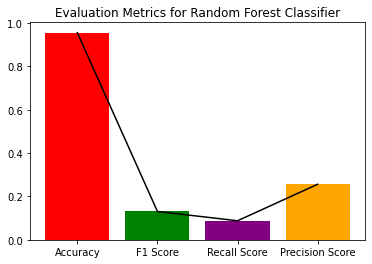


	Table 3

         deaths  pred
899007        0     1
1057250       0     0
490454        0     0
1307121       0     0
251263        0     0
********************** Evaluation metrics for test dataset **************************

('Model roc score:', 54.0)
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    370367
           1       0.26      0.09      0.13     14540

    accuracy                           0.96    384907
   macro avg       0.61      0.54      0.55    384907
weighted avg       0.94      0.96      0.95    384907

matrix 
 AxesSubplot(0.125,0.125;0.62x0.755)
********************************* feature importances**************************


feature_importances:  
 age_group         0.335996
datum             0.319879
density_county    0.248690
density_state     0.065360
geschlecht_org    0.030076
dtype: float64
('Model roc score:', 54.0)
******************************** confusion matrix *****************************




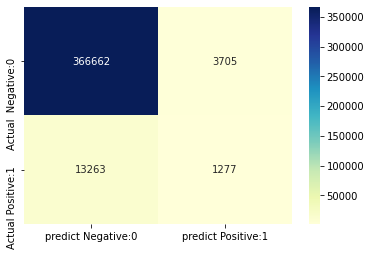

,Pred 0(recovered),Pred 1(deaths)
True 0(recovered),TN = 366662 (TNR = 99.00%),FP = 3705 (FPR = 1.00%)
True 1(deaths),FN = 13263 (FNR = 91.22%),TP = 1277 (TPR = 8.78%)


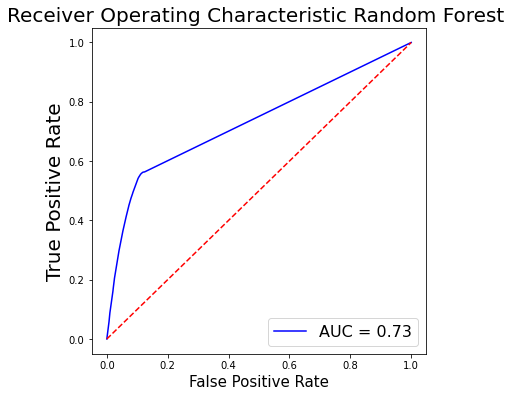

In [32]:

print('Accuracy of test_data: ', accuracy_score(y_test, pred))
print('Accuracy of train_data: ', accuracy_score(y_train, pred_train))

recall = rs(y_test,pred)
precision = ps(y_test,pred)
f1 = fs(y_test,pred)
ma = dtc.score(X_test,y_test)
print('*** Evaluation metrics for test dataset ***\n')
print('Recall Score: ',recall)
print('Precision Score: ',precision)
print('F1 Score: ',f1)
print('Accuracy: ',ma)
plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],[ma,f1,recall,precision],color=['red','green','purple','orange'])
plt.plot([ma,f1,recall,precision],color='black')
plt.title('Evaluation Metrics for Random Forest Classifier')
plt.show()
a = pd.DataFrame(y_test)
a['pred']= dtc.predict(X_test)
print('\n\tTable 3\n')
print(a.head())

def conf_matrix(y_test,pred):
    ((tn, fp), (fn, tp)) =metrics.confusion_matrix(y_test, pred)
    ((tnr,fpr),(fnr,tpr))= normalize(metrics.confusion_matrix(y_test, pred), axis=1, norm='l1')
    return pd.DataFrame([[f'TN = {tn} (TNR = {tnr:1.2%})', 
                                f'FP = {fp} (FPR = {fpr:1.2%})'], 
                         [f'FN = {fn} (FNR = {fnr:1.2%})', 
                                f'TP = {tp} (TPR = {tpr:1.2%})']],
            index=['True 0(recovered)', 'True 1(deaths)'], 
            columns=['Pred 0(recovered)', 
                            'Pred 1(deaths)'])

print('********************** Evaluation metrics for test dataset **************************\n')
print(('Model roc score:',100*roc_auc_score(y_test,pred).round(2)))
print(classification_report(y_test, pred))
cnf_matrix=confusion_matrix(y_test, pred)


cm_matrix = pd.DataFrame(data=cnf_matrix, columns=['predict Negative:0', 'predict Positive:1'], 
                            index=['Actual  Negative:0', 'Actual Positive:1'])
print('matrix \n',sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu'))
feature_scores = pd.Series(dtc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print('********************************* feature importances**************************\n\n')
print('feature_importances:  \n',feature_scores)

print(('Model roc score:',100*roc_auc_score(y_test,pred).round(2)))

print('******************************** confusion matrix *****************************\n\n')
plt.show()
fig, ax = plt.subplots(figsize = (6,6))
probs = dtc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})
plt.subplots_adjust(wspace=1)
conf_matrix(y_test,pred)

# Die Ergebnisse:
    1) Decision Tree hat die Minderheitsklasse(Anzahl der gestorbenen Personen) nicht gut vorhergesagt (Siehe Confusion Matrix)
    2) Der mögliche Grund dafür:
        Der untersuchten Trainingsdatensatz ist Imbalnced:
        Anzahl der genesenen Fälle ist: 1.482.502                                                      
        Anzahl der Todesfälle ist: 57.123   

# Die Lösungen:
    1) Nutzung der Resampling-Methode 
       from imblearn.under_sampling import RandomUnderSampler, NearMiss
       from imblearn.over_sampling import RandomOverSampler, SMOTE
    2) Änderung der Parameter des Algorithmus (Nutzung der Funktion GridSearchCV, 
                                               um der Parameter des bestes Modul zu identifizieren)
       from sklearn.model_selection import GridSearchCV
    3) Verwendung anderer Algorithmus
    

# Nutzung der Funktion GridSearchCV, um der Parameter des bestes Modul zu identifizieren.

In [33]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'max_depth': [1,2,3,4,5], 
                     'min_samples_split': [2,4,6,8,10]}]
scores = ['recall']
for score in scores:
    
    print()
    print(f"Tuning hyperparameters for {score}")
    print()
    
    clf = GridSearchCV(
        DecisionTreeClassifier(), tuned_parameters,
        scoring = f'{score}_macro'
    )
    clf.fit(X_train, y_train)
    
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds,
                                 clf.cv_results_['params']):
        print(f"{mean:0.3f} (+/-{std*2:0.03f}) for {params}")


Tuning hyperparameters for recall

Best parameters set found on development set:

{'max_depth': 5, 'min_samples_split': 2}

Grid scores on development set:
0.500 (+/-0.000) for {'max_depth': 1, 'min_samples_split': 2}
0.500 (+/-0.000) for {'max_depth': 1, 'min_samples_split': 4}
0.500 (+/-0.000) for {'max_depth': 1, 'min_samples_split': 6}
0.500 (+/-0.000) for {'max_depth': 1, 'min_samples_split': 8}
0.500 (+/-0.000) for {'max_depth': 1, 'min_samples_split': 10}
0.500 (+/-0.000) for {'max_depth': 2, 'min_samples_split': 2}
0.500 (+/-0.000) for {'max_depth': 2, 'min_samples_split': 4}
0.500 (+/-0.000) for {'max_depth': 2, 'min_samples_split': 6}
0.500 (+/-0.000) for {'max_depth': 2, 'min_samples_split': 8}
0.500 (+/-0.000) for {'max_depth': 2, 'min_samples_split': 10}
0.500 (+/-0.000) for {'max_depth': 3, 'min_samples_split': 2}
0.500 (+/-0.000) for {'max_depth': 3, 'min_samples_split': 4}
0.500 (+/-0.000) for {'max_depth': 3, 'min_samples_split': 6}
0.500 (+/-0.000) for {'max_depth': 

In [44]:

dtc= DecisionTreeClassifier(max_depth = 5, min_samples_split = 2)
y = df.deaths
X = df.drop(['deaths'],axis=1)
X_train_input, X_test_input, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_test=X_test_input.drop(['state','county','date','gender','cases', 'recovered'], axis=1)
X_train=X_train_input.drop(['state','county','date','gender','cases', 'recovered'], axis=1)

In [45]:
import time
import os
import psutil
 
def get_process_memory():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    return mem_info.rss

mem_before=get_process_memory()
start=time.time()
dtc.fit(X_train, y_train)
finish=time.time()- start
mem_after= get_process_memory()
print("\n","memory before (Byte): ",mem_before,"\n","memory after (Byte):", mem_after ,"\n", "used_memory (Byte):",mem_after - mem_before,"\n",
        "time (Sekunde):", finish)



 memory before (Byte):  1019244544 
 memory after (Byte): 1019248640 
 used_memory (Byte): 4096 
 time (Sekunde): 2.2560501098632812


In [46]:
import time
import os
import psutil
 
def get_process_memory():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    return mem_info.rss

mem_before=get_process_memory()
start=time.time()

pred = np.array(dtc.predict(X_test))
pred_train = np.array(dtc.predict(X_train))

finish=time.time()- start
mem_after= get_process_memory()
print("\n","memory before (Byte): ",mem_before,"\n","memory after (Byte):", mem_after ,"\n", "used_memory (Byte):",mem_after - mem_before,"\n",
        "time (Sekunde):", finish)


 memory before (Byte):  1019248640 
 memory after (Byte): 1019248640 
 used_memory (Byte): 0 
 time (Sekunde): 0.18214797973632812


Accuracy of test_data:  0.9622246412769838
Accuracy of train_data:  0.9631225978983613
*** Evaluation metrics for test dataset ***

Recall Score:  0.0
Precision Score:  0.0
F1 Score:  0.0
Accuracy:  0.9622246412769838


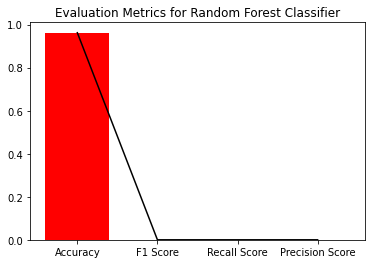


	Table 3

         deaths  pred
899007        0     0
1057250       0     0
490454        0     0
1307121       0     0
251263        0     0
********************** Evaluation metrics for test dataset **************************

('Model roc score:', 50.0)
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    370367
           1       0.00      0.00      0.00     14540

    accuracy                           0.96    384907
   macro avg       0.48      0.50      0.49    384907
weighted avg       0.93      0.96      0.94    384907

matrix 
 AxesSubplot(0.125,0.125;0.62x0.755)
********************************* feature importances**************************


feature_importances:  
 age_group         0.912461
geschlecht_org    0.081380
datum             0.002719
density_county    0.002124
density_state     0.001316
dtype: float64
('Model roc score:', 50.0)
******************************** confusion matrix *****************************




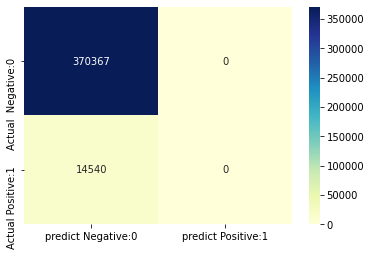

,Pred 0(recovered),Pred 1(deaths)
True 0(recovered),TN = 370367 (TNR = 100.00%),FP = 0 (FPR = 0.00%)
True 1(deaths),FN = 14540 (FNR = 100.00%),TP = 0 (TPR = 0.00%)


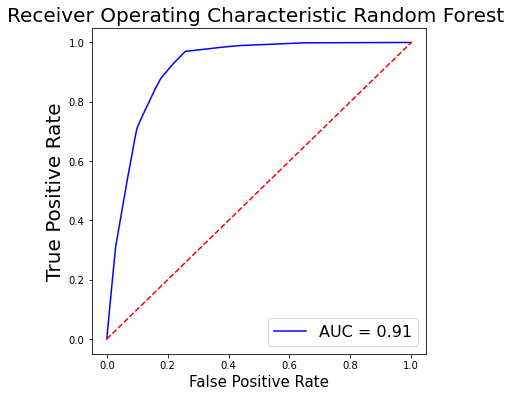

In [47]:

print('Accuracy of test_data: ', accuracy_score(y_test, pred))
print('Accuracy of train_data: ', accuracy_score(y_train, pred_train))

recall = rs(y_test,pred)
precision = ps(y_test,pred)
f1 = fs(y_test,pred)
ma = dtc.score(X_test,y_test)
print('*** Evaluation metrics for test dataset ***\n')
print('Recall Score: ',recall)
print('Precision Score: ',precision)
print('F1 Score: ',f1)
print('Accuracy: ',ma)
plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],[ma,f1,recall,precision],color=['red','green','purple','orange'])
plt.plot([ma,f1,recall,precision],color='black')
plt.title('Evaluation Metrics for Random Forest Classifier')
plt.show()
a = pd.DataFrame(y_test)
a['pred']= dtc.predict(X_test)
print('\n\tTable 3\n')
print(a.head())

def conf_matrix(y_test,pred):
    ((tn, fp), (fn, tp)) =metrics.confusion_matrix(y_test, pred)
    ((tnr,fpr),(fnr,tpr))= normalize(metrics.confusion_matrix(y_test, pred), axis=1, norm='l1')
    return pd.DataFrame([[f'TN = {tn} (TNR = {tnr:1.2%})', 
                                f'FP = {fp} (FPR = {fpr:1.2%})'], 
                         [f'FN = {fn} (FNR = {fnr:1.2%})', 
                                f'TP = {tp} (TPR = {tpr:1.2%})']],
            index=['True 0(recovered)', 'True 1(deaths)'], 
            columns=['Pred 0(recovered)', 
                            'Pred 1(deaths)'])

print('********************** Evaluation metrics for test dataset **************************\n')
print(('Model roc score:',100*roc_auc_score(y_test,pred).round(2)))
print(classification_report(y_test, pred))
cnf_matrix=confusion_matrix(y_test, pred)


cm_matrix = pd.DataFrame(data=cnf_matrix, columns=['predict Negative:0', 'predict Positive:1'], 
                            index=['Actual  Negative:0', 'Actual Positive:1'])
print('matrix \n',sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu'))
feature_scores = pd.Series(dtc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print('********************************* feature importances**************************\n\n')
print('feature_importances:  \n',feature_scores)

print(('Model roc score:',100*roc_auc_score(y_test,pred).round(2)))

print('******************************** confusion matrix *****************************\n\n')
plt.show()
fig, ax = plt.subplots(figsize = (6,6))
probs = dtc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})
plt.subplots_adjust(wspace=1)
conf_matrix(y_test,pred)

In [59]:
rus =RandomUnderSampler()
dtc= DecisionTreeClassifier()
y = df.deaths
X = df.drop(['deaths'],axis=1)
X_train_input, X_test_input, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_test=X_test_input.drop(['state','county','date','gender','cases', 'recovered'], axis=1)
X_train=X_train_input.drop(['state','county','date','gender','cases', 'recovered'], axis=1)

In [60]:
import time
import os
import psutil
 
def get_process_memory():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    return mem_info.rss

mem_before=get_process_memory()
start=time.time()
dtc.fit(X_train_rus, y_train_rus)
finish=time.time()- start
mem_after= get_process_memory()
print("\n","memory before (Byte): ",mem_before,"\n","memory after (Byte):", mem_after ,"\n", "used_memory (Byte):",mem_after - mem_before,"\n",
        "time (Sekunde):", finish)


 memory before (Byte):  1012731904 
 memory after (Byte): 1011761152 
 used_memory (Byte): -970752 
 time (Sekunde): 0.23636722564697266


In [61]:
import time
import os
import psutil
 
def get_process_memory():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    return mem_info.rss

mem_before=get_process_memory()
start=time.time()
X_train_rus, y_train_rus = rus.fit_sample(X_train, y_train)
finish=time.time()- start
mem_after= get_process_memory()
print("\n","memory before (Byte): ",mem_before,"\n","memory after (Byte):", mem_after ,"\n", "used_memory (Byte):",mem_after - mem_before,"\n",
        "time (Sekunde):", finish)


 memory before (Byte):  1011769344 
 memory after (Byte): 1012445184 
 used_memory (Byte): 675840 
 time (Sekunde): 0.4537827968597412


Accuracy of test_data:  0.8022821097044222
Accuracy of train_data:  0.8726252260291666
Recall: 0.777
********************** Evaluation metrics for test dataset **************************

('Model roc score:', 79.0)
              precision    recall  f1-score   support

           0       0.99      0.80      0.89    370367
           1       0.13      0.78      0.23     14540

    accuracy                           0.80    384907
   macro avg       0.56      0.79      0.56    384907
weighted avg       0.96      0.80      0.86    384907

Recall Score:  0.7768913342503438
Precision Score:  0.13422850692175153
F1 Score:  0.22890723947515074
Accuracy:  0.8022821097044222


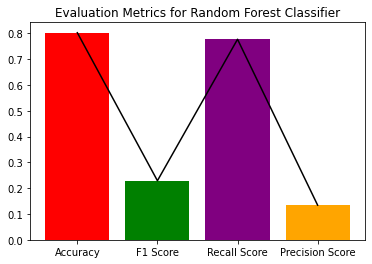


	Table 3

         deaths  pred
899007        0     1
1057250       0     1
490454        0     1
1307121       0     1
251263        0     0
matrix 
 AxesSubplot(0.125,0.125;0.62x0.755)
********************************* feature importances**************************


feature_importances:  
 age_group         0.656329
datum             0.164690
density_county    0.129350
density_state     0.040130
geschlecht_org    0.009501
dtype: float64
******************************** confusion matrix *****************************




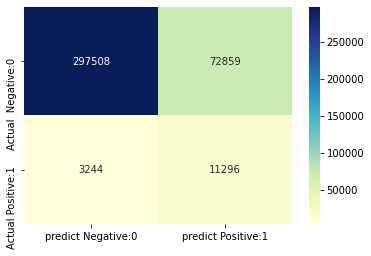

,Pred 0(recovered),Pred 1(deaths)
True 0(recovered),TN = 297508 (TNR = 80.33%),FP = 72859 (FPR = 19.67%)
True 1(deaths),FN = 3244 (FNR = 22.31%),TP = 11296 (TPR = 77.69%)


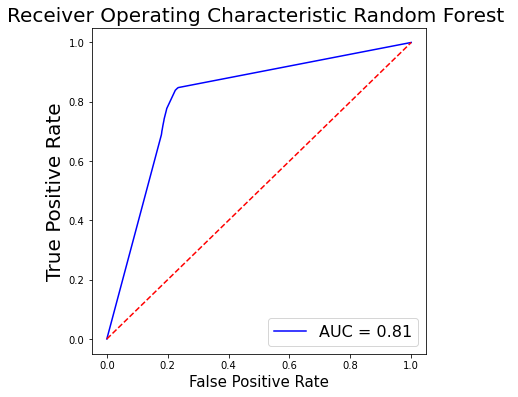

In [62]:
pred = np.array(dtc.predict(X_test))
pred_train = np.array(dtc.predict(X_train_rus))
print('Accuracy of test_data: ', accuracy_score(y_test, pred))
print('Accuracy of train_data: ', accuracy_score(y_train_rus, pred_train))
print("Recall: {0:.3f}".format(recall_score(y_test, pred)))

print('********************** Evaluation metrics for test dataset **************************\n')
print(('Model roc score:',100*roc_auc_score(y_test,pred).round(2)))
print(classification_report(y_test, pred))
cnf_matrix=confusion_matrix(y_test, pred)

pred = np.array(dtc.predict(X_test))
recall = rs(y_test,pred)
precision = ps(y_test,pred)
f1 = fs(y_test,pred)
ma = dtc.score(X_test,y_test)
print('Recall Score: ',recall)
print('Precision Score: ',precision)
print('F1 Score: ',f1)
print('Accuracy: ',ma)
plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],[ma,f1,recall,precision],color=['red','green','purple','orange'])
plt.plot([ma,f1,recall,precision],color='black')
plt.title('Evaluation Metrics for Random Forest Classifier')
plt.show()
a = pd.DataFrame(y_test)
a['pred']= dtc.predict(X_test)
print('\n\tTable 3\n')
print(a.head())

def conf_matrix(y_test,pred):
    ((tn, fp), (fn, tp)) =metrics.confusion_matrix(y_test, pred)
    ((tnr,fpr),(fnr,tpr))= normalize(metrics.confusion_matrix(y_test, pred), axis=1, norm='l1')
    return pd.DataFrame([[f'TN = {tn} (TNR = {tnr:1.2%})', 
                                f'FP = {fp} (FPR = {fpr:1.2%})'], 
                         [f'FN = {fn} (FNR = {fnr:1.2%})', 
                                f'TP = {tp} (TPR = {tpr:1.2%})']],
            index=['True 0(recovered)', 'True 1(deaths)'], 
            columns=['Pred 0(recovered)', 
                            'Pred 1(deaths)'])


cm_matrix = pd.DataFrame(data=cnf_matrix, columns=['predict Negative:0', 'predict Positive:1'], 
                            index=['Actual  Negative:0', 'Actual Positive:1'])
print('matrix \n',sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu'))
feature_scores = pd.Series(dtc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print('********************************* feature importances**************************\n\n')
print('feature_importances:  \n',feature_scores)
print('******************************** confusion matrix *****************************\n\n')
plt.show()

fig, ax = plt.subplots(figsize = (6,6))
probs = dtc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)
ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})
plt.subplots_adjust(wspace=1)

conf_matrix(y_test,pred)

In [95]:
rus =RandomUnderSampler()
dtc= DecisionTreeClassifier(max_depth = 5, min_samples_split = 2)
y = df.deaths
X = df.drop(['deaths'],axis=1)
X_train_input, X_test_input, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_test=X_test_input.drop(['state','county','date','gender','cases', 'recovered'], axis=1)
X_train=X_train_input.drop(['state','county','date','gender','cases', 'recovered'], axis=1)

In [96]:
import time
import os
import psutil
 
def get_process_memory():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    return mem_info.rss

mem_before=get_process_memory()
start=time.time()
dtc.fit(X_train_rus, y_train_rus)
finish=time.time()- start
mem_after= get_process_memory()
print("\n","memory before (Byte): ",mem_before,"\n","memory after (Byte):", mem_after ,"\n", "used_memory (Byte):",mem_after - mem_before,"\n",
        "time (Sekunde):", finish)


 memory before (Byte):  1261240320 
 memory after (Byte): 1256292352 
 used_memory (Byte): -4947968 
 time (Sekunde): 0.083099365234375


In [97]:
import time
import os
import psutil
 
def get_process_memory():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    return mem_info.rss

mem_before=get_process_memory()
start=time.time()
X_train_rus, y_train_rus = rus.fit_sample(X_train, y_train)
finish=time.time()- start
mem_after= get_process_memory()
print("\n","memory before (Byte): ",mem_before,"\n","memory after (Byte):", mem_after ,"\n", "used_memory (Byte):",mem_after - mem_before,"\n",
        "time (Sekunde):", finish)


 memory before (Byte):  1256296448 
 memory after (Byte): 1259261952 
 used_memory (Byte): 2965504 
 time (Sekunde): 0.4472379684448242


Accuracy of test_data:  0.7573543739136986
Accuracy of train_data:  0.8563393842613249
Recall: 0.963
********************** Evaluation metrics for test dataset **************************

('Model roc score:', 86.0)
              precision    recall  f1-score   support

           0       1.00      0.75      0.86    370367
           1       0.13      0.96      0.23     14540

    accuracy                           0.76    384907
   macro avg       0.56      0.86      0.54    384907
weighted avg       0.97      0.76      0.83    384907

Recall Score:  0.963273727647868
Precision Score:  0.13105887637085
F1 Score:  0.23072614654717977
Accuracy:  0.7573543739136986


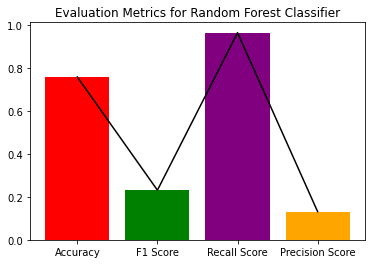


	Table 3

         deaths  pred
899007        0     1
1057250       0     0
490454        0     1
1307121       0     1
251263        0     0
matrix 
 AxesSubplot(0.125,0.125;0.62x0.755)
********************************* feature importances**************************


feature_importances:  
 age_group         0.983899
geschlecht_org    0.014099
density_county    0.001573
datum             0.000241
density_state     0.000188
dtype: float64
******************************** confusion matrix *****************************




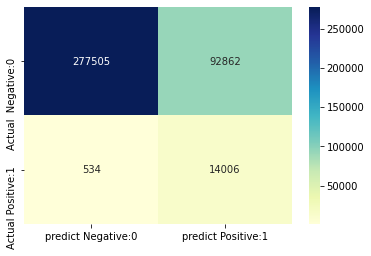

,Pred 0(recovered),Pred 1(deaths)
True 0(recovered),TN = 277505 (TNR = 74.93%),FP = 92862 (FPR = 25.07%)
True 1(deaths),FN = 534 (FNR = 3.67%),TP = 14006 (TPR = 96.33%)


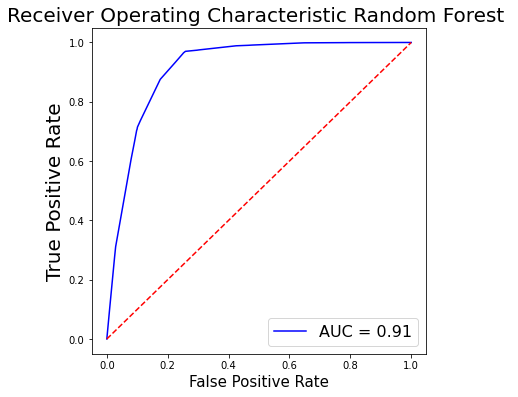

In [98]:
pred = np.array(dtc.predict(X_test))
pred_train = np.array(dtc.predict(X_train_rus))
print('Accuracy of test_data: ', accuracy_score(y_test, pred))
print('Accuracy of train_data: ', accuracy_score(y_train_rus, pred_train))
print("Recall: {0:.3f}".format(recall_score(y_test, pred)))

print('********************** Evaluation metrics for test dataset **************************\n')
print(('Model roc score:',100*roc_auc_score(y_test,pred).round(2)))
print(classification_report(y_test, pred))
cnf_matrix=confusion_matrix(y_test, pred)

pred = np.array(dtc.predict(X_test))
recall = rs(y_test,pred)
precision = ps(y_test,pred)
f1 = fs(y_test,pred)
ma = dtc.score(X_test,y_test)
print('Recall Score: ',recall)
print('Precision Score: ',precision)
print('F1 Score: ',f1)
print('Accuracy: ',ma)
plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],[ma,f1,recall,precision],color=['red','green','purple','orange'])
plt.plot([ma,f1,recall,precision],color='black')
plt.title('Evaluation Metrics for Random Forest Classifier')
plt.show()
a = pd.DataFrame(y_test)
a['pred']= dtc.predict(X_test)
print('\n\tTable 3\n')
print(a.head())

def conf_matrix(y_test,pred):
    ((tn, fp), (fn, tp)) =metrics.confusion_matrix(y_test, pred)
    ((tnr,fpr),(fnr,tpr))= normalize(metrics.confusion_matrix(y_test, pred), axis=1, norm='l1')
    return pd.DataFrame([[f'TN = {tn} (TNR = {tnr:1.2%})', 
                                f'FP = {fp} (FPR = {fpr:1.2%})'], 
                         [f'FN = {fn} (FNR = {fnr:1.2%})', 
                                f'TP = {tp} (TPR = {tpr:1.2%})']],
            index=['True 0(recovered)', 'True 1(deaths)'], 
            columns=['Pred 0(recovered)', 
                            'Pred 1(deaths)'])


cm_matrix = pd.DataFrame(data=cnf_matrix, columns=['predict Negative:0', 'predict Positive:1'], 
                            index=['Actual  Negative:0', 'Actual Positive:1'])
print('matrix \n',sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu'))
feature_scores = pd.Series(dtc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print('********************************* feature importances**************************\n\n')
print('feature_importances:  \n',feature_scores)
print('******************************** confusion matrix *****************************\n\n')
plt.show()

fig, ax = plt.subplots(figsize = (6,6))
probs = dtc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)
ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})
plt.subplots_adjust(wspace=1)

conf_matrix(y_test,pred)

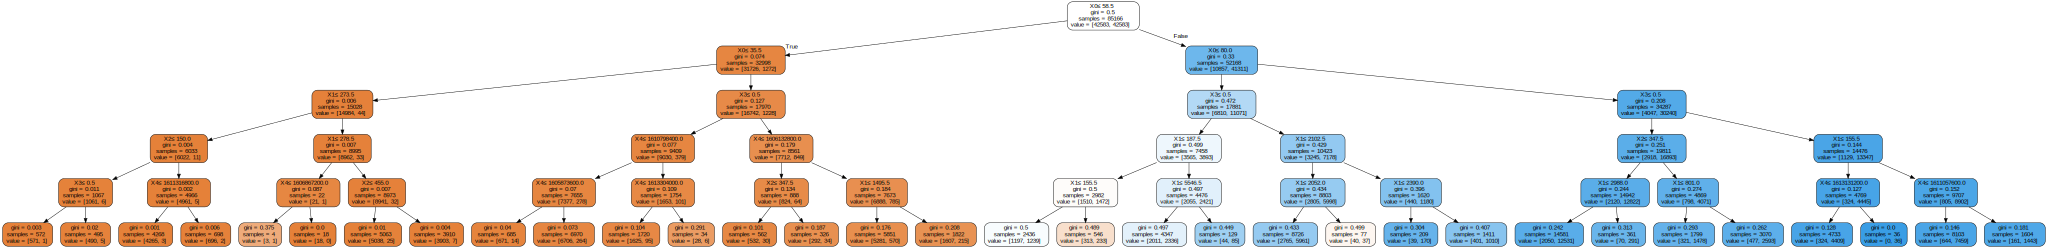

In [100]:

from sklearn import tree
import graphviz 
dot_data = tree.export_graphviz(dtc, out_file=None, 
#                               feature_names=X_train.columns,  
#                               class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

# Bewerung der Ergebnisse mit RandomUnderSampling:
    1) Minderheitsklasse (Anzahl der Todesfälle) wird mit 69.80 % richtig (True Positve) vorhergesagt
    2) False Negative Rate ist 30.20 % 
    

In [41]:
rus =RandomUnderSampler()
dtc= DecisionTreeClassifier()
y = df.deaths
X = df.drop(['deaths'],axis=1)
X_train_input, X_test_input, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_test=X_test_input.drop(['state','county','date','gender','cases', 'recovered'], axis=1)
X_train=X_train_input.drop(['state','county','date','gender','cases', 'recovered'], axis=1)

In [42]:
import time
import os
import psutil
 
def get_process_memory():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    return mem_info.rss

mem_before=get_process_memory()
start=time.time()
X_train_rus, y_train_rus = rus.fit_sample(X_train, y_train)
finish=time.time()- start
mem_after= get_process_memory()
print("\n","memory before (Byte): ",mem_before,"\n","memory after (Byte):", mem_after ,"\n", "used_memory (Byte):",mem_after - mem_before,"\n",
        "time (Sekunde):", finish)


 memory before (Byte):  901337088 
 memory after (Byte): 898781184 
 used_memory (Byte): -2555904 
 time (Sekunde): 0.4118990898132324


In [43]:
import time
import os
import psutil
 
def get_process_memory():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    return mem_info.rss

mem_before=get_process_memory()
start=time.time()
dtc.fit(X_train_rus, y_train_rus)
finish=time.time()- start
mem_after= get_process_memory()
print("\n","memory before (Byte): ",mem_before,"\n","memory after (Byte):", mem_after ,"\n", "used_memory (Byte):",mem_after - mem_before,"\n",
        "time (Sekunde):", finish)


 memory before (Byte):  898785280 
 memory after (Byte): 905043968 
 used_memory (Byte): 6258688 
 time (Sekunde): 0.22739124298095703


Accuracy of test_data:  0.8028043137693002
Accuracy of train_data:  0.9474085902825071
Recall: 0.777
********************** Evaluation metrics for test dataset **************************

('Model roc score:', 79.0)
              precision    recall  f1-score   support

           0       0.99      0.80      0.89    370367
           1       0.13      0.78      0.23     14540

    accuracy                           0.80    384907
   macro avg       0.56      0.79      0.56    384907
weighted avg       0.96      0.80      0.86    384907

Recall Score:  0.7770288858321871
Precision Score:  0.1345672836418209
F1 Score:  0.22940567321163882
Accuracy:  0.8028043137693002


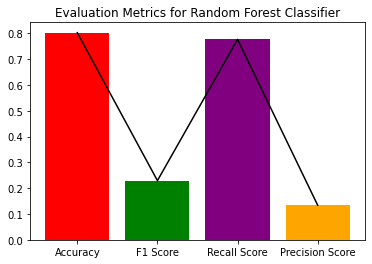


	Table 3

         deaths  pred
899007        0     1
1057250       0     0
490454        0     1
1307121       0     0
251263        0     0
matrix 
 AxesSubplot(0.125,0.125;0.62x0.755)
********************************* feature importances**************************


feature_importances:  
 age_group         0.648213
datum             0.174041
density_county    0.132783
density_state     0.035645
geschlecht_org    0.009318
dtype: float64
******************************** confusion matrix *****************************




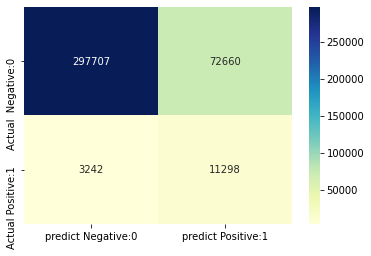

,Pred 0(recovered),Pred 1(deaths)
True 0(recovered),TN = 297707 (TNR = 80.38%),FP = 72660 (FPR = 19.62%)
True 1(deaths),FN = 3242 (FNR = 22.30%),TP = 11298 (TPR = 77.70%)


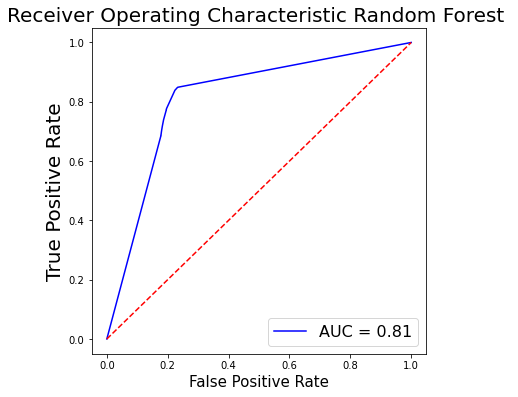

In [47]:
pred = np.array(dtc.predict(X_test))
pred_train = np.array(dtc.predict(X_train_rus))
print('Accuracy of test_data: ', accuracy_score(y_test, pred))
print('Accuracy of train_data: ', accuracy_score(y_train_rus, pred_train))
print("Recall: {0:.3f}".format(recall_score(y_test, pred)))

print('********************** Evaluation metrics for test dataset **************************\n')
print(('Model roc score:',100*roc_auc_score(y_test,pred).round(2)))
print(classification_report(y_test, pred))
cnf_matrix=confusion_matrix(y_test, pred)

pred = np.array(dtc.predict(X_test))
recall = rs(y_test,pred)
precision = ps(y_test,pred)
f1 = fs(y_test,pred)
ma = dtc.score(X_test,y_test)
print('Recall Score: ',recall)
print('Precision Score: ',precision)
print('F1 Score: ',f1)
print('Accuracy: ',ma)
plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],[ma,f1,recall,precision],color=['red','green','purple','orange'])
plt.plot([ma,f1,recall,precision],color='black')
plt.title('Evaluation Metrics for Random Forest Classifier')
plt.show()
a = pd.DataFrame(y_test)
a['pred']= dtc.predict(X_test)
print('\n\tTable 3\n')
print(a.head())

def conf_matrix(y_test,pred):
    ((tn, fp), (fn, tp)) =metrics.confusion_matrix(y_test, pred)
    ((tnr,fpr),(fnr,tpr))= normalize(metrics.confusion_matrix(y_test, pred), axis=1, norm='l1')
    return pd.DataFrame([[f'TN = {tn} (TNR = {tnr:1.2%})', 
                                f'FP = {fp} (FPR = {fpr:1.2%})'], 
                         [f'FN = {fn} (FNR = {fnr:1.2%})', 
                                f'TP = {tp} (TPR = {tpr:1.2%})']],
            index=['True 0(recovered)', 'True 1(deaths)'], 
            columns=['Pred 0(recovered)', 
                            'Pred 1(deaths)'])


cm_matrix = pd.DataFrame(data=cnf_matrix, columns=['predict Negative:0', 'predict Positive:1'], 
                            index=['Actual  Negative:0', 'Actual Positive:1'])
print('matrix \n',sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu'))
feature_scores = pd.Series(dtc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print('********************************* feature importances**************************\n\n')
print('feature_importances:  \n',feature_scores)
print('******************************** confusion matrix *****************************\n\n')
plt.show()

fig, ax = plt.subplots(figsize = (6,6))
probs = dtc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)
ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})
plt.subplots_adjust(wspace=1)

conf_matrix(y_test,pred)

# NearMiss

In [67]:
near =NearMiss()
dtc= DecisionTreeClassifier(max_depth = 5, min_samples_split = 2)
y = df.deaths
X = df.drop(['deaths'],axis=1)
X_train_input, X_test_input, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_test=X_test_input.drop(['state','county','date','gender','cases', 'recovered'], axis=1)
X_train=X_train_input.drop(['state','county','date','gender','cases', 'recovered'], axis=1)

In [68]:
import time
import os
import psutil
 
def get_process_memory():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    return mem_info.rss

mem_before=get_process_memory()
start=time.time()
X_train_near, y_train_near = near.fit_sample(X_train, y_train)
finish=time.time()- start
mem_after= get_process_memory()
print("\n","memory before (Byte): ",mem_before,"\n","memory after (Byte):", mem_after ,"\n", "used_memory (Byte):",mem_after - mem_before,"\n",
        "time (Sekunde):", finish)


 memory before (Byte):  1017425920 
 memory after (Byte): 1027112960 
 used_memory (Byte): 9687040 
 time (Sekunde): 12.584052324295044


In [69]:
import time
import os
import psutil
 
def get_process_memory():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    return mem_info.rss

mem_before=get_process_memory()
start=time.time()
dtc.fit(X_train_near, y_train_near)
finish=time.time()- start
mem_after= get_process_memory()
print("\n","memory before (Byte): ",mem_before,"\n","memory after (Byte):", mem_after ,"\n", "used_memory (Byte):",mem_after - mem_before,"\n",
        "time (Sekunde):", finish)


 memory before (Byte):  1027112960 
 memory after (Byte): 1027112960 
 used_memory (Byte): 0 
 time (Sekunde): 0.07988882064819336


Accuracy of test_data:  0.2884359078946343
Accuracy of train_data:  0.6605218044759645
Recall: 0.538
********************** Evaluation metrics for test dataset **************************

('Model roc score:', 41.0)
              precision    recall  f1-score   support

           0       0.94      0.28      0.43    370367
           1       0.03      0.54      0.05     14540

    accuracy                           0.29    384907
   macro avg       0.48      0.41      0.24    384907
weighted avg       0.90      0.29      0.42    384907

Recall Score:  0.5378266850068776
Precision Score:  0.02843781137948841
F1 Score:  0.05401932814324102
Accuracy:  0.2884359078946343


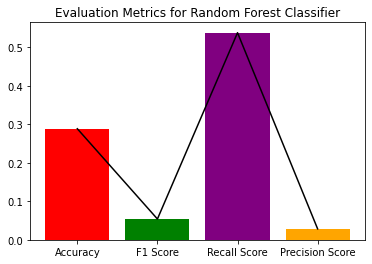


	Table 3

         deaths  pred
899007        0     1
1057250       0     1
490454        0     0
1307121       0     0
251263        0     0
matrix 
 AxesSubplot(0.125,0.125;0.62x0.755)
********************************* feature importances**************************


feature_importances:  
 density_state     0.338747
geschlecht_org    0.287455
datum             0.185556
density_county    0.120783
age_group         0.067459
dtype: float64
******************************** confusion matrix *****************************




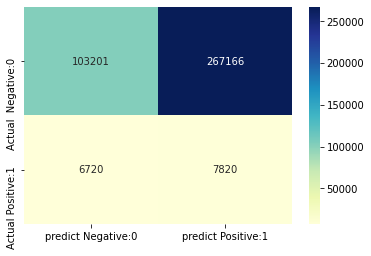

,Pred 0(recovered),Pred 1(deaths)
True 0(recovered),TN = 103201 (TNR = 27.86%),FP = 267166 (FPR = 72.14%)
True 1(deaths),FN = 6720 (FNR = 46.22%),TP = 7820 (TPR = 53.78%)


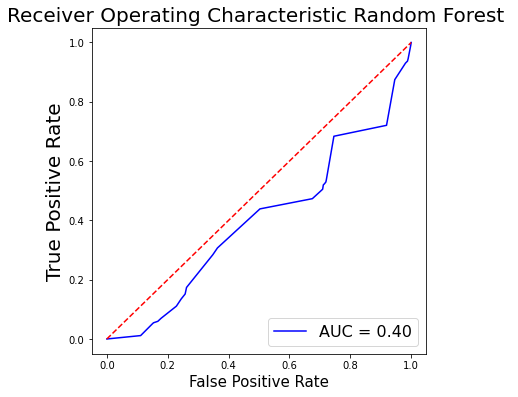

In [70]:
pred = np.array(dtc.predict(X_test))
pred_train = np.array(dtc.predict(X_train_near))
print('Accuracy of test_data: ', accuracy_score(y_test, pred))
print('Accuracy of train_data: ', accuracy_score(y_train_near, pred_train))
print("Recall: {0:.3f}".format(recall_score(y_test, pred)))

print('********************** Evaluation metrics for test dataset **************************\n')
print(('Model roc score:',100*roc_auc_score(y_test,pred).round(2)))
print(classification_report(y_test, pred))
cnf_matrix=confusion_matrix(y_test, pred)

pred = np.array(dtc.predict(X_test))
recall = rs(y_test,pred)
precision = ps(y_test,pred)
f1 = fs(y_test,pred)
ma = dtc.score(X_test,y_test)
print('Recall Score: ',recall)
print('Precision Score: ',precision)
print('F1 Score: ',f1)
print('Accuracy: ',ma)
plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],[ma,f1,recall,precision],color=['red','green','purple','orange'])
plt.plot([ma,f1,recall,precision],color='black')
plt.title('Evaluation Metrics for Random Forest Classifier')
plt.show()
a = pd.DataFrame(y_test)
a['pred']= dtc.predict(X_test)
print('\n\tTable 3\n')
print(a.head())

def conf_matrix(y_test,pred):
    ((tn, fp), (fn, tp)) =metrics.confusion_matrix(y_test, pred)
    ((tnr,fpr),(fnr,tpr))= normalize(metrics.confusion_matrix(y_test, pred), axis=1, norm='l1')
    return pd.DataFrame([[f'TN = {tn} (TNR = {tnr:1.2%})', 
                                f'FP = {fp} (FPR = {fpr:1.2%})'], 
                         [f'FN = {fn} (FNR = {fnr:1.2%})', 
                                f'TP = {tp} (TPR = {tpr:1.2%})']],
            index=['True 0(recovered)', 'True 1(deaths)'], 
            columns=['Pred 0(recovered)', 
                            'Pred 1(deaths)'])


cm_matrix = pd.DataFrame(data=cnf_matrix, columns=['predict Negative:0', 'predict Positive:1'], 
                            index=['Actual  Negative:0', 'Actual Positive:1'])
print('matrix \n',sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu'))
feature_scores = pd.Series(dtc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print('********************************* feature importances**************************\n\n')
print('feature_importances:  \n',feature_scores)
print('******************************** confusion matrix *****************************\n\n')
plt.show()

fig, ax = plt.subplots(figsize = (6,6))
probs = dtc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)
ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})
plt.subplots_adjust(wspace=1)

conf_matrix(y_test,pred)

# RandomOverSampler

In [74]:
ros =RandomOverSampler()
dtc= DecisionTreeClassifier(max_depth = 5, min_samples_split = 2)
y = df.deaths
X = df.drop(['deaths'],axis=1)
X_train_input, X_test_input, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_test=X_test_input.drop(['state','county','date','gender','cases', 'recovered'], axis=1)
X_train=X_train_input.drop(['state','county','date','gender','cases', 'recovered'], axis=1)

In [75]:
import time
import os
import psutil
 
def get_process_memory():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    return mem_info.rss
mem_before=get_process_memory()
start=time.time()
X_train_ros, y_train_ros = ros.fit_sample(X_train, y_train)
finish=time.time() - start
mem_after=get_process_memory()
print("\n","memory before (Byte): ",mem_before,"\n","memory after (Byte):", mem_after ,"\n", "used_memory (Byte):",mem_after - mem_before,"\n",
        "time (Sekunde):", finish)


 memory before (Byte):  934354944 
 memory after (Byte): 1058988032 
 used_memory (Byte): 124633088 
 time (Sekunde): 0.9140851497650146


In [76]:
import time
import os
import psutil

def get_process_memory():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    return mem_info.rss

mem_before = get_process_memory()
start = time.time()
dtc.fit(X_train_ros, y_train_ros)
finish = time.time() - start
mem_after = get_process_memory()
print("\n","memory before (Byte): ",mem_before,"\n","memory after (Byte):" ,mem_after ,"\n", "used_memory (Byte):",mem_after - mem_before,"\n",
        "time (Sekunde):", finish)


 memory before (Byte):  1058988032 
 memory after (Byte): 1058988032 
 used_memory (Byte): 0 
 time (Sekunde): 4.965627670288086


Accuracy of test_data:  0.7530988004894689
Accuracy of train_data:  0.8563645600579066
Recall: 0.967
********************** Evaluation metrics for test dataset **************************

('Model roc score:', 86.0)
              precision    recall  f1-score   support

           0       1.00      0.74      0.85    370367
           1       0.13      0.97      0.23     14540

    accuracy                           0.75    384907
   macro avg       0.56      0.86      0.54    384907
weighted avg       0.97      0.75      0.83    384907

Recall Score:  0.9674690508940853
Precision Score:  0.12949699893213537
F1 Score:  0.2284197194076384
Accuracy:  0.7530988004894689


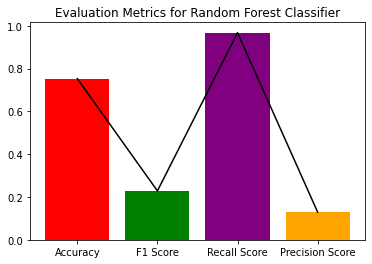


	Table 3

         deaths  pred
899007        0     1
1057250       0     0
490454        0     1
1307121       0     1
251263        0     0
matrix 
 AxesSubplot(0.125,0.125;0.62x0.755)
********************************* feature importances**************************


feature_importances:  
 age_group         0.984477
geschlecht_org    0.014093
density_county    0.000730
datum             0.000612
density_state     0.000087
dtype: float64
******************************** confusion matrix *****************************




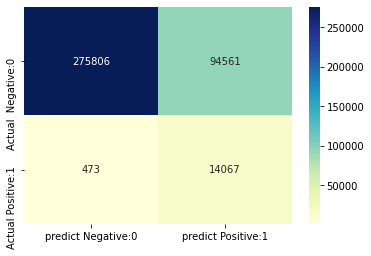

,Pred 0(recovered),Pred 1(deaths)
True 0(recovered),TN = 275806 (TNR = 74.47%),FP = 94561 (FPR = 25.53%)
True 1(deaths),FN = 473 (FNR = 3.25%),TP = 14067 (TPR = 96.75%)


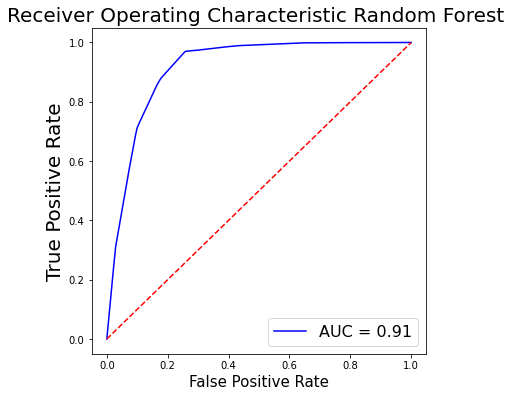

In [77]:
pred = np.array(dtc.predict(X_test))
pred_train = np.array(dtc.predict(X_train_ros))
print('Accuracy of test_data: ', accuracy_score(y_test, pred))
print('Accuracy of train_data: ', accuracy_score(y_train_ros, pred_train))
print("Recall: {0:.3f}".format(recall_score(y_test, pred)))
print('********************** Evaluation metrics for test dataset **************************\n')
print(('Model roc score:',100*roc_auc_score(y_test,pred).round(2)))
print(classification_report(y_test, pred))
cnf_matrix=confusion_matrix(y_test, pred)

pred = np.array(dtc.predict(X_test))
recall = rs(y_test,pred)
precision = ps(y_test,pred)
f1 = fs(y_test,pred)
ma = dtc.score(X_test,y_test)
print('Recall Score: ',recall)
print('Precision Score: ',precision)
print('F1 Score: ',f1)
print('Accuracy: ',ma)
plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],[ma,f1,recall,precision],color=['red','green','purple','orange'])
plt.plot([ma,f1,recall,precision],color='black')
plt.title('Evaluation Metrics for Random Forest Classifier')
plt.show()
a = pd.DataFrame(y_test)
a['pred']= dtc.predict(X_test)
print('\n\tTable 3\n')
print(a.head())

def conf_matrix(y_test,pred):
    ((tn, fp), (fn, tp)) =metrics.confusion_matrix(y_test, pred)
    ((tnr,fpr),(fnr,tpr))= normalize(metrics.confusion_matrix(y_test, pred), axis=1, norm='l1')
    return pd.DataFrame([[f'TN = {tn} (TNR = {tnr:1.2%})', 
                                f'FP = {fp} (FPR = {fpr:1.2%})'], 
                         [f'FN = {fn} (FNR = {fnr:1.2%})', 
                                f'TP = {tp} (TPR = {tpr:1.2%})']],
            index=['True 0(recovered)', 'True 1(deaths)'], 
            columns=['Pred 0(recovered)', 
                            'Pred 1(deaths)'])


cm_matrix = pd.DataFrame(data=cnf_matrix, columns=['predict Negative:0', 'predict Positive:1'], 
                            index=['Actual  Negative:0', 'Actual Positive:1'])
print('matrix \n',sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu'))
feature_scores = pd.Series(dtc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print('********************************* feature importances**************************\n\n')
print('feature_importances:  \n',feature_scores)
print('******************************** confusion matrix *****************************\n\n')
plt.show()

fig, ax = plt.subplots(figsize = (6,6))
probs = dtc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)
ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})
plt.subplots_adjust(wspace=1)

conf_matrix(y_test,pred)

# SMOTE

In [78]:
somte =SMOTE(random_state=42)
dtc= DecisionTreeClassifier(max_depth = 5, min_samples_split = 2)
y = df.deaths
X = df.drop(['deaths'],axis=1)
X_train_input, X_test_input, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_test=X_test_input.drop(['state','county','date','gender','cases', 'recovered'], axis=1)
X_train=X_train_input.drop(['state','county','date','gender','cases', 'recovered'], axis=1)

In [79]:
import time
import os
import psutil
 
def get_process_memory():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    return mem_info.rss
mem_before=get_process_memory()
start=time.time()
X_train_som, y_train_som = somte.fit_sample(X_train, y_train)
finish=time.time()- start
mem_after= get_process_memory()
print("\n","memory before (Byte): ",mem_before,"\n","memory after (Byte):", mem_after ,"\n", "used_memory (Byte):",mem_after - mem_before,"\n",
        "time (Sekunde):", finish)


 memory before (Byte):  1076219904 
 memory after (Byte): 1186414592 
 used_memory (Byte): 110194688 
 time (Sekunde): 1.3281071186065674


In [80]:
import time
import os
import psutil
 
def get_process_memory():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    return mem_info.rss

mem_before=get_process_memory()
start=time.time()
dtc.fit(X_train_som, y_train_som)
finish=time.time()- start
mem_after= get_process_memory()
print("\n","memory before (Byte): ",mem_before,"\n","memory after (Byte):", mem_after ,"\n", "used_memory (Byte):",mem_after - mem_before,"\n",
        "time (Sekunde):", finish)


 memory before (Byte):  1186414592 
 memory after (Byte): 1186414592 
 used_memory (Byte): 0 
 time (Sekunde): 4.875239849090576


Accuracy of test_data:  0.8051685212272055
Accuracy of train_data:  0.8782620814919052
Recall: 0.878
********************** Evaluation metrics for test dataset **************************

('Model roc score:', 84.0)
              precision    recall  f1-score   support

           0       0.99      0.80      0.89    370367
           1       0.15      0.88      0.25     14540

    accuracy                           0.81    384907
   macro avg       0.57      0.84      0.57    384907
weighted avg       0.96      0.81      0.86    384907

Recall Score:  0.878404401650619
Precision Score:  0.14851853574584864
F1 Score:  0.2540781411633643
Accuracy:  0.8051685212272055


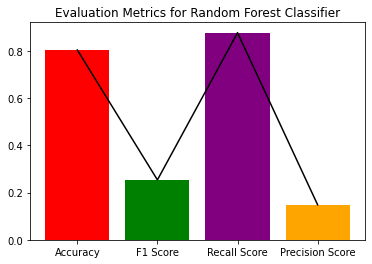


	Table 3

         deaths  pred
899007        0     1
1057250       0     0
490454        0     1
1307121       0     1
251263        0     0
matrix 
 AxesSubplot(0.125,0.125;0.62x0.755)
********************************* feature importances**************************


feature_importances:  
 age_group         9.926293e-01
density_state     7.193597e-03
geschlecht_org    1.742202e-04
density_county    2.862629e-06
datum             6.841521e-08
dtype: float64
******************************** confusion matrix *****************************




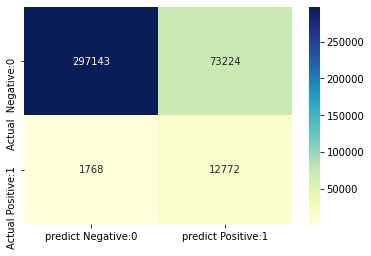

,Pred 0(recovered),Pred 1(deaths)
True 0(recovered),TN = 297143 (TNR = 80.23%),FP = 73224 (FPR = 19.77%)
True 1(deaths),FN = 1768 (FNR = 12.16%),TP = 12772 (TPR = 87.84%)


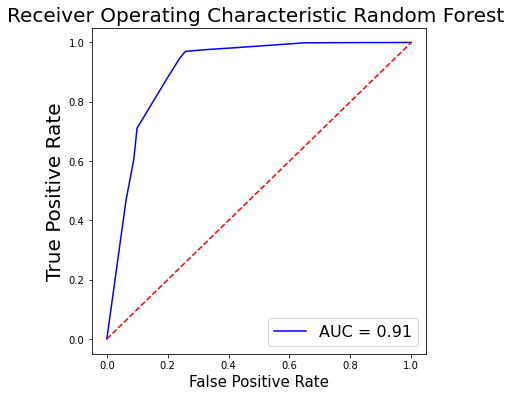

In [81]:
pred = np.array(dtc.predict(X_test))
pred_train = np.array(dtc.predict(X_train_som))
print('Accuracy of test_data: ', accuracy_score(y_test, pred))
print('Accuracy of train_data: ', accuracy_score(y_train_som, pred_train))
print("Recall: {0:.3f}".format(recall_score(y_test, pred)))

print('********************** Evaluation metrics for test dataset **************************\n')
print(('Model roc score:',100*roc_auc_score(y_test,pred).round(2)))
print(classification_report(y_test, pred))
cnf_matrix=confusion_matrix(y_test, pred)

pred = np.array(dtc.predict(X_test))
recall = rs(y_test,pred)
precision = ps(y_test,pred)
f1 = fs(y_test,pred)
ma = dtc.score(X_test,y_test)
print('Recall Score: ',recall)
print('Precision Score: ',precision)
print('F1 Score: ',f1)
print('Accuracy: ',ma)
plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],[ma,f1,recall,precision],color=['red','green','purple','orange'])
plt.plot([ma,f1,recall,precision],color='black')
plt.title('Evaluation Metrics for Random Forest Classifier')
plt.show()
a = pd.DataFrame(y_test)
a['pred']= dtc.predict(X_test)
print('\n\tTable 3\n')
print(a.head())

def conf_matrix(y_test,pred):
    ((tn, fp), (fn, tp)) =metrics.confusion_matrix(y_test, pred)
    ((tnr,fpr),(fnr,tpr))= normalize(metrics.confusion_matrix(y_test, pred), axis=1, norm='l1')
    return pd.DataFrame([[f'TN = {tn} (TNR = {tnr:1.2%})', 
                                f'FP = {fp} (FPR = {fpr:1.2%})'], 
                         [f'FN = {fn} (FNR = {fnr:1.2%})', 
                                f'TP = {tp} (TPR = {tpr:1.2%})']],
            index=['True 0(recovered)', 'True 1(deaths)'], 
            columns=['Pred 0(recovered)', 
                            'Pred 1(deaths)'])


cm_matrix = pd.DataFrame(data=cnf_matrix, columns=['predict Negative:0', 'predict Positive:1'], 
                            index=['Actual  Negative:0', 'Actual Positive:1'])
print('matrix \n',sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu'))
feature_scores = pd.Series(dtc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print('********************************* feature importances**************************\n\n')
print('feature_importances:  \n',feature_scores)
print('******************************** confusion matrix *****************************\n\n')
plt.show()

fig, ax = plt.subplots(figsize = (6,6))
probs = dtc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)
ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})
plt.subplots_adjust(wspace=1)

conf_matrix(y_test,pred)

# Die Ergbnisse sagte aus:
    1) RandomUnderResampling mit der Funktion GradSearchCv leifert das beste Trainingsmodel 
    2) NearMiss Resampling-Methode bringt die am schlemesten Ergebisse

# Finish